In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%load_ext blackcellmagic

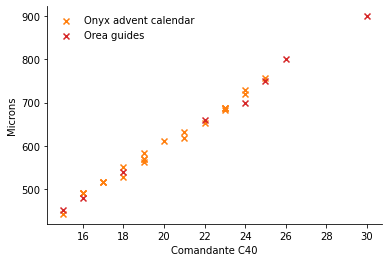

In [3]:
onyx_recipes = pd.read_csv("data/onyx_coffee_advent_calendar_2023.csv", index_col=0)

# Orea recipes from https://www.orea.uk/guides and the printed guides.
orea_recipes = pd.DataFrame(
    [
        {"Comandante C40": 15, "Microns": 450},
        {"Comandante C40": 16, "Microns": 480},
        {"Comandante C40": 18, "Microns": 540},
        {"Comandante C40": 22, "Microns": 660},
        {"Comandante C40": 24, "Microns": 700},
        {"Comandante C40": 25, "Microns": 750},
        {"Comandante C40": 26, "Microns": 800},
        {"Comandante C40": 30, "Microns": 900},
    ]
)

plt.scatter(
    onyx_recipes["Comandante C40"],
    onyx_recipes["Microns"],
    label="Onyx advent calendar",
    marker="x",
    color="tab:orange",
)
plt.scatter(
    orea_recipes["Comandante C40"],
    orea_recipes["Microns"],
    label="Orea guides",
    marker="x",
    color="tab:red",
)
plt.xlabel("Comandante C40")
plt.ylabel("Microns")
plt.legend(frameon=False)
sns.despine()
plt.show()

In [4]:
# Pixel data from https://honestcoffeeguide.com/coffee-grind-size-chart/
pixels_at_1400_micons = 900
c40_at_40 = 702.2142857142857
ode2_at_1 = 176.78571428571428
ode2_at_11 = 776.4642857142858 - 30

c40_to_ode = {}
gradient = 10 / (ode2_at_11 - ode2_at_1)
offset = 1 - gradient * ode2_at_1
for click in range(10, 43):
    pixels_of_click = c40_at_40 * click / 40
    ode2_at_pixels = gradient * pixels_of_click + offset
    c40_to_ode[click] = np.round(ode2_at_pixels * 3) / 3

for click in [16, 20, 24, 28]:
    print(f"{click} ~ {c40_to_ode[click]:.2f}")

16 ~ 2.67
20 ~ 4.00
24 ~ 5.33
28 ~ 6.67


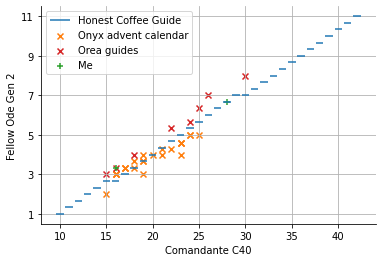

In [5]:
def to_ode(microns):
    pixels_of_microns = microns / 1400 * pixels_at_1400_micons
    ode2_at_pixels = gradient * pixels_of_microns + offset
    return np.round(ode2_at_pixels * 3) / 3


orea_recipes["Fellow Ode Gen 2"] = orea_recipes["Microns"].apply(to_ode)

plt.hlines(
    c40_to_ode.values(),
    [key - 0.4 for key in c40_to_ode.keys()],
    [key + 0.4 for key in c40_to_ode.keys()],
    label="Honest Coffee Guide",
)
plt.scatter(
    onyx_recipes["Comandante C40"],
    onyx_recipes["Fellow Ode Gen 2"],
    label="Onyx advent calendar",
    marker="x",
    color="tab:orange",
)
plt.scatter(
    orea_recipes["Comandante C40"],
    orea_recipes["Fellow Ode Gen 2"],
    label="Orea guides",
    marker="x",
    color="tab:red",
)
plt.scatter(
    [16, 28],
    [3.33, 6.67],
    label="Me",
    marker="+",
    color="tab:green",
)
plt.legend(loc="upper left")
plt.xlabel("Comandante C40")
plt.ylabel("Fellow Ode Gen 2")
plt.yticks(np.arange(1, 12, 2))
plt.grid(which="both")
sns.despine()
plt.show()